In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import datetime, pandas as pd

Churn data preprocessing

In [6]:
df = pd.read_excel("/content/churn_to_AverageSales.xlsx")
print(df.head())
print(df.info())

   Unnamed: 0  ... average sales
0           0  ...     22360.466
1           1  ...       198.190
2           2  ...     25754.008
3           3  ...      1242.890
4           4  ...      1370.000

[5 rows x 33 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13196 entries, 0 to 13195
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Unnamed: 0                13196 non-null  int64         
 1   bussinesID                13196 non-null  object        
 2   billing_cycle             13196 non-null  object        
 3   country                   12780 non-null  object        
 4   created_on                13196 non-null  datetime64[ns]
 5   last_login                13196 non-null  object        
 6   tenure                    13196 non-null  int64         
 7   stores/franchise          13196 non-null  int64         
 8   no_of_repair_jobs         13196 non-null  int

In [7]:
df.sample(5) #show 5 samples

,Unnamed: 0,bussinesID,billing_cycle,country,created_on,last_login,tenure,stores/franchise,no_of_repair_jobs,no_of_customers,total_revenue,amount_receivable,no_of_purchases,use_Paypal,use_Cayan,use_Stripe,use_MailChimp,use_PaypalHere,use_SquareDeep,use_MobileSentrix,use_CustomerPortal,use_PrintNode,use_Square,use_SmsGlobal,use_SmsBroadcast,use_ClickaTell,use_RingCentral,use_Square.1,use_RepairDeskPay,use_FreePBX,use_GoogleCloudPrint,current_bussiness_status,average sales
10197,10197,80ca4ee101d7cf153771824cc0b00098,Monthly,Australia,2020-01-29 03:51:30,2020-01-29 11:51:32,0,1,0,0,0.0,0.0,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,0.0
7222,7222,07b1c04a30f798b5506c1ec5acfb9031,Monthly,United States,2019-01-31 18:25:11,2019-03-02 03:51:32,0,1,4,12,0.0,0.0,0,True,False,True,False,True,True,False,True,False,True,False,False,False,False,True,False,False,False,0,0.0
5318,5318,1dacb10f0623c67cb7dbb37587d8b38a,Monthly,Canada,2018-05-27 14:42:52,2018-06-04 01:33:03,0,1,2,1,0.0,0.0,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,0.0
9779,9779,68dfff284e90ee47fcc6b4941047edad,Monthly,India,2019-12-07 19:53:13,2019-12-08 10:38:49,0,1,1,0,0.0,0.0,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,0.0
1229,1229,a50abba8132a77191791390c3eb19fe7,Monthly,NaN,2016-07-11 14:19:49,2016-09-22 06:44:45,0,1,0,2,0.0,0.0,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,0.0


In [8]:
df.columns #Data columns

Index(['Unnamed: 0', 'bussinesID', 'billing_cycle', 'country', 'created_on',
       'last_login', 'tenure', 'stores/franchise', 'no_of_repair_jobs',
       'no_of_customers', 'total_revenue', 'amount_receivable',
       'no_of_purchases', 'use_Paypal', 'use_Cayan', 'use_Stripe',
       'use_MailChimp', 'use_PaypalHere', 'use_SquareDeep',
       'use_MobileSentrix', 'use_CustomerPortal', 'use_PrintNode',
       'use_Square', 'use_SmsGlobal', 'use_SmsBroadcast', 'use_ClickaTell',
       'use_RingCentral', 'use_Square.1', 'use_RepairDeskPay', 'use_FreePBX',
       'use_GoogleCloudPrint', 'current_bussiness_status', 'average sales'],
      dtype='object')

In [9]:
#data columns renaming
df.rename(columns={'bussinesID':'b_id', 'billing_cycle':'b_cycle', 'country':'country', 'created_on':'crea_on', 'last_login':'lst_login',
       'tenure':'tenu', 'stores/franchise':'stor', 'no_of_repair_jobs':'job_repair', 'no_of_customers':'cust_no',
       'total_revenue':'t_rev', 'amount_receivable':'am_rec', 'no_of_purchases':'purch', 'use_Paypal':'use_pp',
       'use_Cayan':'use_c', 'use_Stripe':'use_st', 'use_MailChimp':'use_mc', 'use_PaypalHere':'use_ph',
       'use_SquareDeep':'use_sd', 'use_MobileSentrix':'use_ms', 'use_CustomerPortal':'use_cp',
       'use_PrintNode':'use_pn', 'use_Square':'use_s', 'use_SmsGlobal':'use_sg', 'use_SmsBroadcast':'use_sb',
       'use_ClickaTell':'use_ct', 'use_RingCentral':'use_rc', 'use_Square.1':'use_s1',
       'use_RepairDeskPay':'use_rdp', 'use_FreePBX':'use_fp', 'use_GoogleCloudPrint':'use_gcp',
       'current_bussiness_status':'curr_b_status',''}, inplace=True)
df.head()

,Unnamed: 0,b_id,b_cycle,country,crea_on,lst_login,tenu,stor,job_repair,cust_no,t_rev,am_rec,purch,use_pp,use_c,use_st,use_mc,use_ph,use_sd,use_ms,use_cp,use_pn,use_s,use_sg,use_sb,use_ct,use_rc,use_s1,use_rdp,use_fp,use_gcp,curr_b_status,average sales
0,0,c4ca4238a0b923820dcc509a6f75849b,Monthly,United Arab Emirates,2015-07-24 17:45:12,2020-12-16 05:09:02,5,5,593,5465,111802.33,43684.29,0,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,0,22360.466
1,1,45c48cce2e2d7fbdea1afc51c7c6ad26,Monthly,United Kingdom,2015-02-27 11:32:44,(NULL),0,1,3,2,198.19,89.10,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,198.190
2,2,d3d9446802a44259755d38e6d163e820,Monthly,United States,2015-02-28 01:32:05,2021-01-04 11:02:20,5,10,567,26,257540.08,121470.29,0,False,True,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False,True,0,25754.008
3,3,6512bd43d9caa6e02c990b0a82652dca,Monthly,United Kingdom,2015-03-02 06:01:30,2017-12-05 03:00:01,2,2,43,38,2485.78,2030.79,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,1242.890
4,4,aab3238922bcc25a6f606eb525ffdc56,Monthly,Pakistan,2015-03-03 02:28:23,2015-12-01 06:37:11,0,1,9,2,1370.00,1120.00,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,1370.000


In [10]:
df.columns #chk updated column names

Index(['Unnamed: 0', 'b_id', 'b_cycle', 'country', 'crea_on', 'lst_login',
       'tenu', 'stor', 'job_repair', 'cust_no', 't_rev', 'am_rec', 'purch',
       'use_pp', 'use_c', 'use_st', 'use_mc', 'use_ph', 'use_sd', 'use_ms',
       'use_cp', 'use_pn', 'use_s', 'use_sg', 'use_sb', 'use_ct', 'use_rc',
       'use_s1', 'use_rdp', 'use_fp', 'use_gcp', 'curr_b_status',
       'average sales'],
      dtype='object')

In [11]:
df.shape #check data shape

(13196, 33)

In [12]:
df.dtypes #check data types

Unnamed: 0                int64
b_id                     object
b_cycle                  object
country                  object
crea_on          datetime64[ns]
lst_login                object
tenu                      int64
stor                      int64
job_repair                int64
cust_no                   int64
t_rev                   float64
am_rec                  float64
purch                     int64
use_pp                     bool
use_c                      bool
use_st                     bool
use_mc                     bool
use_ph                     bool
use_sd                     bool
use_ms                     bool
use_cp                     bool
use_pn                     bool
use_s                      bool
use_sg                     bool
use_sb                     bool
use_ct                     bool
use_rc                     bool
use_s1                     bool
use_rdp                    bool
use_fp                     bool
use_gcp                    bool
curr_b_s

In [13]:
#check null values
df.isna().sum()

Unnamed: 0         0
b_id               0
b_cycle            0
country          416
crea_on            0
lst_login          0
tenu               0
stor               0
job_repair         0
cust_no            0
t_rev              0
am_rec             0
purch              0
use_pp             0
use_c              0
use_st             0
use_mc             0
use_ph             0
use_sd             0
use_ms             0
use_cp             0
use_pn             0
use_s              0
use_sg             0
use_sb             0
use_ct             0
use_rc             0
use_s1             0
use_rdp            0
use_fp             0
use_gcp            0
curr_b_status      0
average sales      0
dtype: int64

In [14]:
df.info() #data info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13196 entries, 0 to 13195
Data columns (total 33 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Unnamed: 0     13196 non-null  int64         
 1   b_id           13196 non-null  object        
 2   b_cycle        13196 non-null  object        
 3   country        12780 non-null  object        
 4   crea_on        13196 non-null  datetime64[ns]
 5   lst_login      13196 non-null  object        
 6   tenu           13196 non-null  int64         
 7   stor           13196 non-null  int64         
 8   job_repair     13196 non-null  int64         
 9   cust_no        13196 non-null  int64         
 10  t_rev          13196 non-null  float64       
 11  am_rec         13196 non-null  float64       
 12  purch          13196 non-null  int64         
 13  use_pp         13196 non-null  bool          
 14  use_c          13196 non-null  bool          
 15  use_st         1319

In [15]:
churn_data = df.dropna() 
churn_data.head()

,Unnamed: 0,b_id,b_cycle,country,crea_on,lst_login,tenu,stor,job_repair,cust_no,t_rev,am_rec,purch,use_pp,use_c,use_st,use_mc,use_ph,use_sd,use_ms,use_cp,use_pn,use_s,use_sg,use_sb,use_ct,use_rc,use_s1,use_rdp,use_fp,use_gcp,curr_b_status,average sales
0,0,c4ca4238a0b923820dcc509a6f75849b,Monthly,United Arab Emirates,2015-07-24 17:45:12,2020-12-16 05:09:02,5,5,593,5465,111802.33,43684.29,0,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,0,22360.466
1,1,45c48cce2e2d7fbdea1afc51c7c6ad26,Monthly,United Kingdom,2015-02-27 11:32:44,(NULL),0,1,3,2,198.19,89.10,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,198.190
2,2,d3d9446802a44259755d38e6d163e820,Monthly,United States,2015-02-28 01:32:05,2021-01-04 11:02:20,5,10,567,26,257540.08,121470.29,0,False,True,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False,True,0,25754.008
3,3,6512bd43d9caa6e02c990b0a82652dca,Monthly,United Kingdom,2015-03-02 06:01:30,2017-12-05 03:00:01,2,2,43,38,2485.78,2030.79,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,1242.890
4,4,aab3238922bcc25a6f606eb525ffdc56,Monthly,Pakistan,2015-03-03 02:28:23,2015-12-01 06:37:11,0,1,9,2,1370.00,1120.00,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,1370.000


In [16]:
#Statistical Analysis
churn_data.describe()

,Unnamed: 0,tenu,stor,job_repair,cust_no,t_rev,am_rec,purch,curr_b_status,average sales
count,12780.000000,12780.000000,12780.000000,12780.000000,12780.000000,1.278000e+04,1.278000e+04,12780.000000,12780.000000,1.278000e+04
mean,6742.296166,0.261502,1.182473,684.344992,561.829656,3.976964e+05,6.809945e+09,3.289671,0.096322,2.141066e+05
std,3752.364444,0.748531,1.572229,8944.355691,4634.924159,2.254986e+07,7.698118e+11,45.724006,0.295044,9.524769e+06
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00
25%,3552.750000,0.000000,1.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00
50%,6751.500000,0.000000,1.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00
75%,9993.250000,0.000000,1.000000,3.000000,2.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00
max,13195.000000,5.000000,100.000000,649631.000000,370181.000000,2.433955e+09,8.702619e+13,2765.000000,1.000000,8.113184e+08


#Correlation Identification

In [17]:
churn_data.corr()


,Unnamed: 0,tenu,stor,job_repair,cust_no,t_rev,am_rec,purch,use_pp,use_c,use_st,use_mc,use_ph,use_sd,use_ms,use_cp,use_pn,use_s,use_sg,use_sb,use_ct,use_rc,use_s1,use_rdp,use_fp,use_gcp,curr_b_status,average sales
Unnamed: 0,1.000000,-0.282649,-0.035561,-0.050704,-0.045238,-0.011654,-0.013104,-0.001929,-0.079746,-0.036079,-0.010602,-0.019447,0.004416,0.053041,0.105170,0.053414,-0.037832,-0.020212,-0.043407,-0.046902,-0.037229,0.013467,-0.020212,0.062948,0.013914,-0.072057,0.080447,-0.014055
tenu,-0.282649,1.000000,0.106401,0.217581,0.259395,0.048688,0.044184,0.140096,0.265963,0.157084,0.092523,0.202894,0.095778,0.110256,0.147840,0.233971,0.257724,0.166659,0.121933,0.166258,0.104816,0.131457,0.166659,0.124300,0.073282,0.295637,0.455344,0.061302
stor,-0.035561,0.106401,1.000000,0.329253,0.320268,0.023680,-0.001026,0.039766,0.029972,0.082677,0.018980,0.094077,-0.002050,0.023024,0.052880,0.098855,0.052394,0.008703,0.008311,0.008688,0.028650,0.064966,0.008703,0.077992,0.064539,0.053796,0.060625,0.009652
job_repair,-0.050704,0.217581,0.329253,1.000000,0.548404,0.069448,0.007814,0.111919,0.054359,0.071424,0.010137,0.068569,0.009679,0.013227,0.044404,0.063649,0.155025,0.023583,0.026180,0.062247,0.031335,0.048886,0.023583,0.045028,0.030941,0.088969,0.197904,0.051766
cust_no,-0.045238,0.259395,0.320268,0.548404,1.000000,0.097253,0.007865,0.127080,0.088907,0.154824,0.012832,0.123870,0.029567,0.036331,0.111103,0.107106,0.194058,0.051470,0.043018,0.081652,0.053366,0.089702,0.051470,0.106445,0.054318,0.134544,0.264214,0.082384
t_rev,-0.011654,0.048688,0.023680,0.069448,0.097253,1.000000,0.000180,0.052022,0.015724,0.001346,-0.000491,0.097068,-0.000749,-0.001562,-0.000721,0.052964,0.022532,-0.001525,0.119686,0.001354,0.002545,0.004076,-0.001525,0.000397,0.046981,0.053394,0.051695,0.906167
am_rec,-0.013104,0.044184,-0.001026,0.007814,0.007865,0.000180,1.000000,-0.000635,0.045123,-0.000809,-0.000886,-0.001049,0.108754,-0.001357,-0.001789,-0.002036,-0.001241,-0.001586,-0.000828,-0.000628,-0.000702,-0.000736,-0.001586,-0.001107,-0.000456,0.039211,0.027097,0.000554
purch,-0.001929,0.140096,0.039766,0.111919,0.127080,0.052022,-0.000635,1.000000,0.093541,0.081560,0.024831,0.106258,0.066346,0.065750,0.059840,0.147074,0.132965,0.062855,0.083941,0.013806,0.024841,0.175774,0.062855,0.107060,0.084625,0.098454,0.205430,0.091988
use_pp,-0.079746,0.265963,0.029972,0.054359,0.088907,0.015724,0.045123,0.093541,1.000000,0.110031,0.189287,0.164144,0.199481,0.127502,0.122511,0.210626,0.174186,0.186759,0.074952,0.085910,0.079031,0.129026,0.186759,0.110043,0.070338,0.204819,0.174816,0.034603
use_c,-0.036079,0.157084,0.082677,0.071424,0.154824,0.001346,-0.000809,0.081560,0.110031,1.000000,0.051724,0.084836,0.045946,0.060780,0.163599,0.120918,0.099964,0.097842,0.019171,-0.006488,0.058375,0.075850,0.097842,0.072595,0.062274,0.140117,0.116357,0.000161


#Individual column correlation

In [18]:
churn_data['curr_b_status'].corr(churn_data['tenu'])

0.4553440384196699

In [19]:
churn_data['curr_b_status'].corr(churn_data['stor'])

0.060624645948212895

In [20]:
churn_data['curr_b_status'].corr(churn_data['job_repair'])

0.19790432189674234

In [21]:
churn_data['curr_b_status'].corr(churn_data['cust_no'])

0.2642143550644887

In [22]:
churn_data['curr_b_status'].corr(churn_data['t_rev'])

0.0516952669085741

In [23]:
churn_data['curr_b_status'].corr(churn_data['am_rec'])

0.02709680867836067

In [24]:
churn_data['curr_b_status'].corr(churn_data['purch'])

0.20542998534043203

In [25]:
churn_data['curr_b_status'].corr(churn_data['use_pp'])

0.17481603884599167

In [26]:
churn_data['curr_b_status'].corr(churn_data['use_c'])

0.11635683857154737

In [27]:
churn_data['curr_b_status'].corr(churn_data['use_st'])

0.0662224801272599

In [28]:
churn_data['curr_b_status'].corr(churn_data['use_mc'])

0.19203278187531547

In [29]:
churn_data['curr_b_status'].corr(churn_data['use_ph'])

0.09488299982097838

In [30]:
churn_data['curr_b_status'].corr(churn_data['use_sd'])

0.19403343910609844

In [31]:
churn_data['curr_b_status'].corr(churn_data['use_ms'])

0.36540542425956885

In [32]:
churn_data['curr_b_status'].corr(churn_data['use_cp'])

0.2788155942143099

In [33]:
churn_data['curr_b_status'].corr(churn_data['use_pn'])
      

0.2932190500043156

In [34]:
churn_data['curr_b_status'].corr(churn_data[ 'use_s'])

0.1796532908255437

In [35]:
churn_data['curr_b_status'].corr(churn_data['use_sg'])

0.10019729073594774

In [36]:
churn_data['curr_b_status'].corr(churn_data['use_sb'])

0.11961186479924113

In [37]:
churn_data['curr_b_status'].corr(churn_data['use_ct'])

0.061517182392837454

In [38]:
churn_data['curr_b_status'].corr(churn_data['use_rc'])

0.1684527121857197

In [39]:
churn_data['curr_b_status'].corr(churn_data['use_s1'])

0.1796532908255437

In [40]:
churn_data['curr_b_status'].corr(churn_data['job_repair'])
      

0.19790432189674234

In [41]:
churn_data['curr_b_status'].corr(churn_data['use_fp'])

0.11700592671431036

In [42]:
churn_data['curr_b_status'].corr(churn_data['use_gcp'])

0.2401282791876176

#Heatmap visualization

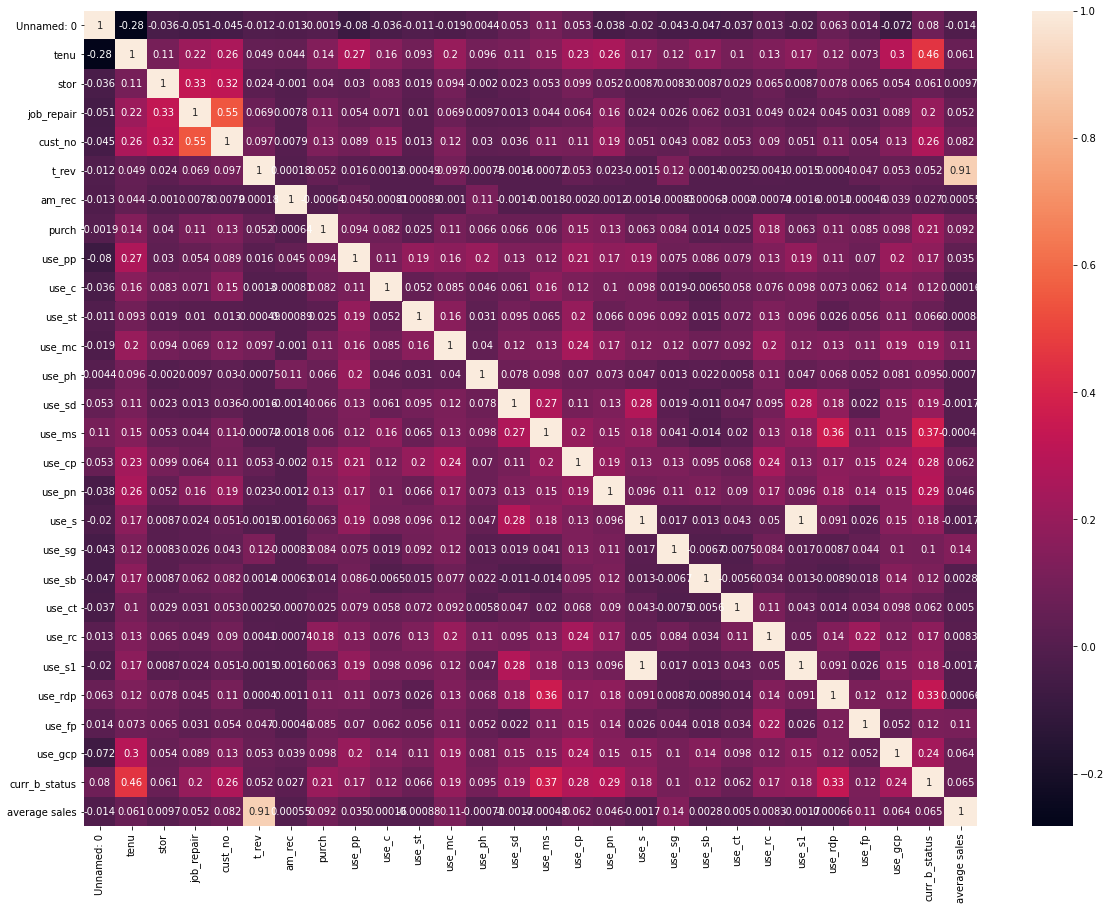

In [43]:
plt.subplots(figsize=(20,15))
sn.heatmap(churn_data.corr(),annot = True)

#histogram visualization

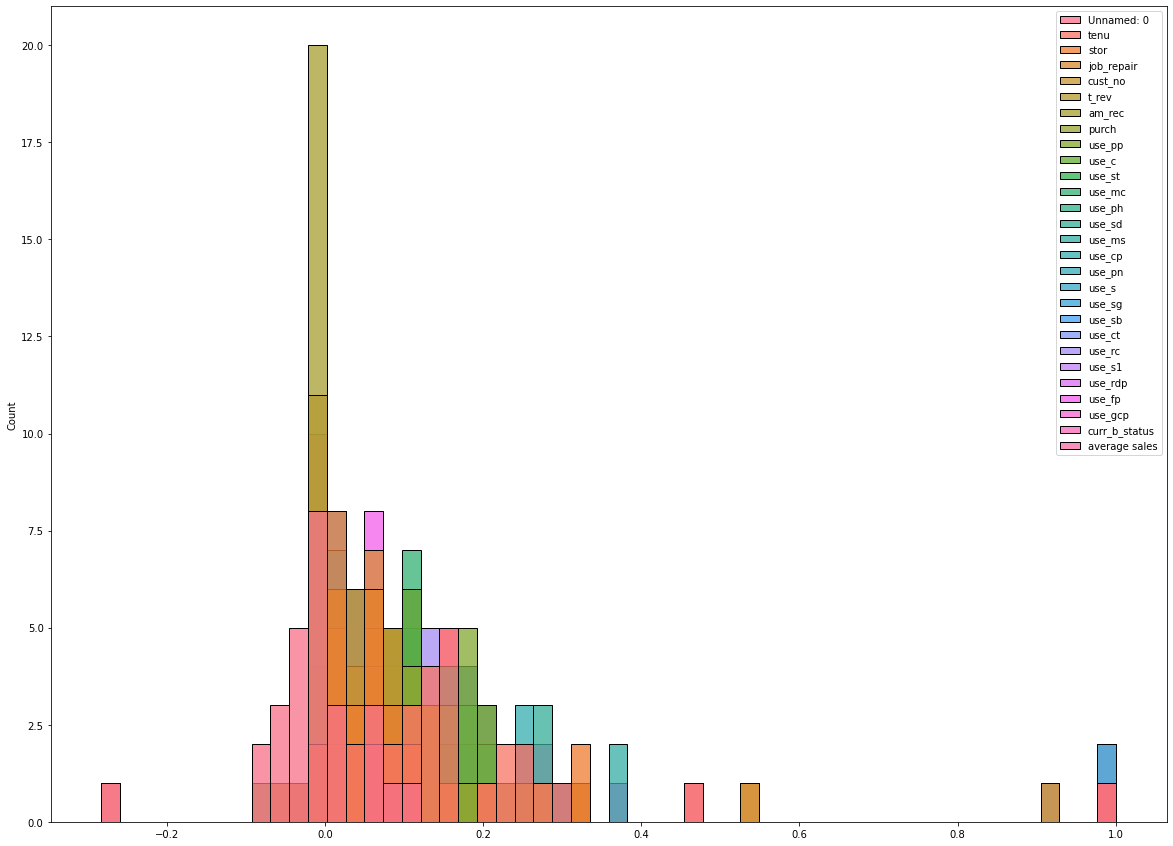

In [44]:
plt.subplots(figsize=(20,15))
sn.histplot(churn_data.corr())

In [45]:
churn_data.dtypes

Unnamed: 0                int64
b_id                     object
b_cycle                  object
country                  object
crea_on          datetime64[ns]
lst_login                object
tenu                      int64
stor                      int64
job_repair                int64
cust_no                   int64
t_rev                   float64
am_rec                  float64
purch                     int64
use_pp                     bool
use_c                      bool
use_st                     bool
use_mc                     bool
use_ph                     bool
use_sd                     bool
use_ms                     bool
use_cp                     bool
use_pn                     bool
use_s                      bool
use_sg                     bool
use_sb                     bool
use_ct                     bool
use_rc                     bool
use_s1                     bool
use_rdp                    bool
use_fp                     bool
use_gcp                    bool
curr_b_s

#Remove Outliers

In [46]:
Q1 = churn_data.quantile(0.25)
Q3 = churn_data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
churn_data['crea_on'] = churn_data['crea_on'].astype(str)
outliers = ((churn_data< (Q1 - 1.5 * IQR))| (churn_data> (Q3 + 1.5 * IQR))).any(axis=1)
outliers

Unnamed: 0       6440.5
tenu                0.0
stor                0.0
job_repair          3.0
cust_no             2.0
t_rev               0.0
am_rec              0.0
purch               0.0
use_pp              0.0
use_c               0.0
use_st              0.0
use_mc              0.0
use_ph              0.0
use_sd              0.0
use_ms              0.0
use_cp              0.0
use_pn              0.0
use_s               0.0
use_sg              0.0
use_sb              0.0
use_ct              0.0
use_rc              0.0
use_s1              0.0
use_rdp             0.0
use_fp              0.0
use_gcp             0.0
curr_b_status       0.0
average sales       0.0
dtype: float64


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


0         True
1         True
2         True
3         True
4         True
         ...  
13191    False
13192    False
13193    False
13194    False
13195    False
Length: 12780, dtype: bool

In [47]:
churn_data_out = churn_data[~((churn_data < (Q1 - 1.5 * IQR)) |(churn_data > (Q3 + 1.5 * IQR))).any(axis=1)]
churn_data_out.shape

(8762, 33)